In [ ]:
#1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#2
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from itertools import combinations 
from Farm_Evaluator import getTurbLoc, loadPowerCurve, binWindResourceData, preProcessing, getAEP



In [ ]:
#3
power_curve   =  loadPowerCurve('/content/drive/My Drive/Shell/Hackathon Data and Files/Data/Shell_Hackathon Dataset/power_curve.csv')

In [ ]:
#4
n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t = preProcessing(power_curve)

In [ ]:
#5
# Years on which the data is available
year_list = ['2007','2008','2009','2013','2014','2015','2017']

wind_data_list = []
for year in year_list:
    wind_data_list.append(pd.read_csv("wind_data_{}.csv".format(year)))

In [ ]:
#6
def calculate_AEP(turb_coords):
    aep = []
    for wind_data in wind_data_list:
        wind_inst_freq =  binWindResourceData(wind_data)
        aep.append(getAEP(turb_rad, turb_coords, power_curve, wind_inst_freq, 
                  n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t))
    return sum(aep)/len(aep)

In [ ]:
#7
turb_rad = 50

In [ ]:
#8
data = pd.read_csv('/content/drive/My Drive/Shell/Hackathon Data and Files/Data/Shell_Hackathon Dataset/turbine_loc_test.csv')
x0 = np.array(data['x'])
y0 = np.array(data['y'])

#parameters
no_of_iterations = 7200
no_of_blocks = no_of_iterations+1
best_sol = 0
voila_x = np.zeros(50)
voila_y = np.zeros(50)


In [ ]:
#9
x = np.zeros((50, no_of_blocks))
y = np.zeros((50, no_of_blocks))

In [ ]:
#10
for tullest in range(50):
  x[tullest][0] = x0[tullest]
  y[tullest][0] = y0[tullest]

In [ ]:
#formula for mutation
#def formula(x):
 # A = x+1
 # if(A>3950):
 #   A = A-3950
  #if(A<50):
  #  A += 3900
 # return A

In [ ]:
#11
def distance_constraint(coords):
  cos = 0.099567846
  sin = 0.995030775
  for tuntun in range(50):
    for con_row in range(50):
      i = 0 #i is a flag that continues running the loop of changing the values to random numbers until the point is outside every other point's ellipse
      while i > 0:
        if (((((((coords[tuntun, 0]*cos) + (coords[tuntun, 1]*sin) -coords[con_row][0])/650)**2))+((((coords[tuntun, 1]*cos) - (coords[tuntun, 0]*sin) - coords[con_row, 1])/400)**2)) < 1):#x0, y0 are values of coordinates(origin shifting)
         coords[con_row][0] = random.randrange(50, 3950)
         coords[con_row][1] = random.randrange(50, 3950)
         i = 1
        else:
          i = 0
  return coords
    

In [ ]:
#mutation with a cloud
distance = 50  #it is the amount of distance between two particles of a cloud in the same direction
for i in range(50):
  for j in range(7200):
    x[i][j+1] = x[i][0] + ((j//360)+1)*distance*(math.cos((j*22)/(7*180)))
    y[i][j+1] = y[i][0] + ((j//360)+1)*distance*(math.sin((j*22)/(7*180)))
   #field boundary check for values of x:
    if (x[i][j+1] > 3950):
      x[i][j+1] = x[i][j+1]-3950
    if (x[i][j+1]<50):
      x[i][j+1] += 3900
   #field boundary check for values of y:
    if (y[i][j+1]>3950):
      y[i][j+1] = x[i][j+1]-3950
    if (y[i][j+1]<50):
      y[i][j+1] += 3900
      
    


      #note that the values have not been checked for distance constraints yet

In [ ]:
x





array([[3690.323986  , 3740.323986  , 3740.31636463, ...,  740.32236351,
         740.20138737,  739.77559366],
       [3259.406706  , 3309.406706  , 3309.39908463, ...,  309.40508351,
         309.28410737,  308.85831366],
       [ 478.5238229 ,  528.5238229 ,  528.51620153, ..., 1478.52220041,
        1478.40122427, 1477.97543056],
       ...,
       [3757.538949  , 3807.538949  , 3807.53132763, ...,  807.53732651,
         807.41635037,  806.99055666],
       [2540.560461  , 2590.560461  , 2590.55283963, ..., 3540.55883851,
        3540.43786237, 3540.01206866],
       [1776.427277  , 1826.427277  , 1826.41965563, ..., 2776.42565451,
        2776.30467837, 2775.87888466]])

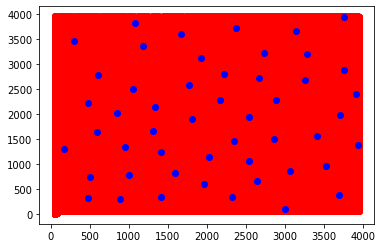

In [ ]:
plt.scatter(x, y, c ='red')
plt.scatter(x0, y0, c ='blue')


In [ ]:
#mutation in which only one formula is used
for j in range(no_of_iterations):
  for i in range(no_of_iterations):
      x[i][j+1] = formula(x[i,j])
      y[i][j+1] = formula(y[i,j])
  Turb_coords = np.zeros((50,50))
  for tull in range(50):
    Turb_coords[tull][0] = x[tull][j]
    Turb_coords[tull][1] = y[tull][j]    
  Turb_coords = distance_constraint(Turb_coords)

NameError: ignored

In [ ]:
#13
#Selection of best values

#Calculating AEP values using one coloumn as a dataset
one_coloumn = np.zeros((50, 2))
for k in range(7200):
  for tuller in range(50):
    one_coloumn[tuller][0] = x[tuller][k]
    one_coloumn[tuller][1] = y[tuller][k]
  one_coloumn = distance_constraint(one_coloumn)
  cost  = calculate_AEP(one_coloumn)
  print(cost)
  if (best_sol < cost):
    best_sol = cost
    print(best_sol)
    #storing values corresponding to best_sol
    for control in range(50):
      voila_x[control] = one_coloumn[control][0]
      voila_y[control] = one_coloumn[control][1]
print("the best soln from data using one coloumn as a dataset out of 7200 coloumns is:")
print(best_sol)


498.3410086277553
498.2467877197265
498.2467877197265
498.2467877197265
498.2467877197265
498.2467877197265
498.2467877197265
498.2467877197265
498.2467877197265
498.2467877197265


KeyboardInterrupt: ignored

In [ ]:
voila_x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#WONT WORK WHEN YOU HAVE 7200 BLOCKS################################################################################################################
#foreward loop
chosen_x = np.zeros(50)
chosen_y = np.zeros(50)
for t in range(50):
  j = t
  for i in range(50):
    chosen_x[i] = x[j][i]
    chosen_y[i] = y[j][i]
    if (j > 48):
      j = j - 50
    j = j + 1
  TURB_COORDS = np.zeros((50, 50))
  for wk in range(50):
    TURB_COORDS[wk, 0] = chosen_x[wk]
    TURB_COORDS[wk, 1] = chosen_y[wk]
  TURB_COORDS = distance_constraint(TURB_COORDS)
  cost = calculate_AEP(TURB_COORDS)
  if (cost >  best_sol):
    best_sol = cost
    for tintin in range(50):
      voila_x[tintin] = chosen_x[tintin]
      voila_y[tintin] = chosen_y[tintin]
    print(best_sol)
      
      

  
#backward loop
t = 0
for t in range(50):
  j = (49)-t
  for i in range(50):
    chosen_x[i] = x[j][i]
    chosen_y[i] = y[j][i]
    if (j == 0):
      j += 49
    j = j - 1
  for wk1 in range(50):
    TURB_COORDS[wk1, 0] = chosen_x[wk1]
    TURB_COORDS[wk1, 1] = chosen_y[wk1]
  TURB_COORDS = distance_constraint(TURB_COORDS)
  cost = calculate_AEP(TURB_COORDS)
  if (cost >  best_sol):
    best_sol = cost
    for tintin in range(50):
      voila_x[tintin] = chosen_x[tintin]
      voila_y[tintin] = chosen_y[tintin]
    print(best_sol)


In [ ]:
#14
#random approach
best_sol = 0
chosen_x = np.zeros(50)
chosen_y = np.zeros(50)
Row_values = np.zeros(50)
for iter in range(100000):#here no_of_iters is the no of times you want different solutions
 for c1 in range(50):
   count = 0
   k = np.random.randint(0, 7199)
   for c2 in range(50):
     if (k == Row_values[c2]):
       count += 1
   if (count > 0):
     c1 = c1 - 1
     continue
   chosen_x[c1] = x[c1][k]
   chosen_y[c1] = y[c1][k]
   Row_values[c1] = k
 TURB_COORDZ = np.zeros((50, 2))
 for pg in range(50):
   TURB_COORDZ[pg, 0] = chosen_x[pg]
   TURB_COORDZ[pg, 1] = chosen_y[pg]
 TURB_COORDZ = distance_constraint(TURB_COORDZ)
 cost = calculate_AEP(TURB_COORDZ)
 if (cost > best_sol):
    best_sol = cost
    print(best_sol)
    for tintin in range(50):   
      voila_x[tintin] = chosen_x[tintin]
      voila_y[tintin] = chosen_y[tintin]
    print(voila_x)
    print(voila_y)
     
      

      

483.8370229012625
[3946.28356891 2995.55937785  775.42190235 2713.21962018  173.47595616
 2955.31525009 3031.52930739 1494.90975795 1482.05441634 3320.23772988
 1231.52244626 2141.94873442 1614.81439552  412.77105905 2948.14252363
 1727.6785198  2260.12306213 3859.89523902  385.68117949 2963.5277713
 3783.04210892   67.5695029  2906.74349303 3551.87226586 3805.76771741
 2375.13846677 1334.18714761 2035.15383514 1745.99180209 2450.04935305
 2960.45989433 3040.25731962 1840.14638262 3294.38695549 2548.80677084
 1991.57762525 3276.05075887  605.39801111 2672.02014938  402.37036141
 2387.71173714  655.76017772 2819.38452357 2239.46635658 1458.99248465
 1884.1828851   865.61750807 3887.99243471 1934.68168981 2366.19326275]
[ 132.04289388 2912.55484597 3823.81396274  985.89757743 1338.14503875
 1562.92095989  819.81270143 1327.75192199 2096.70921565  981.04743423
 1132.24028264 2912.36490649  991.19907966 2458.70515362 1369.71061098
  529.27770003  626.1092918  3167.42752889 3700.18521217 13

In [ ]:
#FINALE
print("Best cost out of above:")
print(best_sol)
print("Best set of coordinates:\n")
print(voila_x)
print(voila_y)

In [ ]:
voila_x

NameError: ignored

In [ ]:
#t = 0
  #for k in range(#blaaah):
   # chosen_x = x[t][k]
    #chosen_y = y[t, k]
    

In [ ]:
#a different approach (a bit wrong)
i = 1000
for a in range(#WHAT_HERE?????????):
  for t in range(50):
    if (a//(50-t) = i):
      a += 50
      t = t-1
      i = t
     continue
    chosen_x[t] = x[a//(50-t), t]
    chosen_y[t] = y[a//(50-t), t]
    i = t
  cost = calculation_AEP(chosen_x, chosen_y)
  if (best_sol < cost):
    best_sol = cost
    voila_x = chosen_x.deepcopy()
    voila_y = chosen_y.deepcopy()